# Ideas
- Compare against analytical methods
- Try to take in to account whether the randomness in generated data set is just bad and causes systematic error, or is it the methods
- Looks like it's a good idea to sample the data sets as well, because there's not that much randomness in the training and AID graph can randomly increase with sample size
- For binary data, convergence is slow for analytical methods as well as for gaussian VAE. binary VAE is really good, actually.

## TODO:
- Load the models here and plot results
- Code new AID calculation for linear model as well

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CEVAE import *
from cevaetools import *
from lineartoydata import *
from lineargaussian_analytical_methods import *
from binary_analytical_methods import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Linear data param1 experiment

In [1064]:
main_folder = "linear_data_tests"

In [1065]:
# Load data gen parameters
sub_folder_params = "params1"
[c_x, c_t, c_yz, c_yt, s_x, s_t, s_y] = load_dataparameters(main_folder, sub_folder_params)

In [1066]:
data_sub_folder = "params1data500to20000"
param_times = 10
dfs, datasets = load_dfs(main_folder, data_sub_folder, param_times=param_times)
datasize = sorted([int(ds) for ds in dfs.keys()])

In [1067]:
device="cpu"

num_epochs=100
lr_start=0.01
lr_end=0.001
z_dim=10
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=0
y_mode=0
x_mode=np.array([0,0])
x_dim = 2
ty_separate_enc=False
z_mode=0
common_stds = False
x_loss_scaling = 1

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]
labels = [str(dsize) for dsize in datasize]

sub_folder_model = "params1data500to20000NNmodels"
models_NN, losses_NN = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [1068]:
num_epochs=100
lr_start=0.01
lr_end=0.01
z_dim=1
p_y_zt_nn_layers=0
p_y_zt_nn_width=30
p_t_z_nn_layers=0
p_t_z_nn_width=30
p_x_z_nn_layers=0
p_x_z_nn_width=30
q_z_nn_layers=0
q_z_nn_width=30
t_mode=0
y_mode=0
x_mode=np.array([0,0])
x_dim = 2
ty_separate_enc=False
z_mode=0
common_stds = True
x_loss_scaling = 1

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "params1data500to20000linearmodels"
models_linear, losses_linear = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [1069]:
num_epochs=100
lr_start=0.01
lr_end=0.01
z_dim=2
p_y_zt_nn_layers=0
p_y_zt_nn_width=30
p_t_z_nn_layers=0
p_t_z_nn_width=30
p_x_z_nn_layers=0
p_x_z_nn_width=30
q_z_nn_layers=0
q_z_nn_width=30
t_mode=0
y_mode=0
x_mode=np.array([0,0])
x_dim = 2
ty_separate_enc=False
z_mode=0
common_stds = True
x_loss_scaling = 1

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "params1data500to20000linearmodelszdim2"
models_linear_zdim2_1, losses_linear_zdim2_1 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [788]:
#--- Additional NN zdim 2 runs for 20000 samples, and completely new NN and linear zdim2 runs for 20000 samples
#First train the NN for the data sets that we already have
param_times = 10

device = 'cpu'
num_epochs=300
lr_start=0.01
lr_end=0.001
z_dim=2
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=0
y_mode=0
x_mode=np.array([0,0])
x_dim = 2
ty_separate_enc=False
z_mode=0
x_loss_scaling = 1
common_stds = False

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "params1data20000NNzdim2"
labels = ["df20000"]
models_NN_zdim2_1, losses_NN_zdim2_1 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

sub_folder_model = "params1data20000_50_NNzdim2"
labels = ["20000"]
models_NN_zdim2_2, losses_NN_zdim2_2 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)


p_y_zt_nn_layers=0
p_y_zt_nn_width=30
p_t_z_nn_layers=0
p_t_z_nn_width=30
p_x_z_nn_layers=0
p_x_z_nn_width=30
q_z_nn_layers=0
q_z_nn_width=30
common_stds=True

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]

sub_folder_model = "params1data20000_50_linearmodelszdim2"
models_linear_zdim2_2, losses_linear_zdim2_2 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [912]:
# Load the 20000 linear models starting from a bad place
starting_model = models_linear_zdim2_1['20000'][4]
sub_folder_model = "models_linearzdim2_badstartstate_2"
device = 'cpu'
models_linear_zdim2_badstart, losses_linear_zdim2_badstart = load_models_losses_started_from_predef_model(main_folder, 
                                sub_folder_model, starting_model, device)

## Calculate AIDs for convergence, 20k 2d experiment and bad starting experiment

In [830]:
#Combine results 20k 2d experiments
models_linear_zdim2 = {'20000':dict()}
losses_linear_zdim2 = {'20000':dict()}
for key in models_linear_zdim2_1['20000']:
    models_linear_zdim2['20000'][key] = models_linear_zdim2_1['20000'][key]
    losses_linear_zdim2['20000'][key] = losses_linear_zdim2_1['20000'][key]
for key in models_linear_zdim2_2['20000']:
    models_linear_zdim2['20000'][key+10] = models_linear_zdim2_2['20000'][key]
    losses_linear_zdim2['20000'][key+10] = losses_linear_zdim2_2['20000'][key]

models_NN_zdim2 = {'20000':dict()}
losses_NN_zdim2 = {'20000':dict()}
for key in models_NN_zdim2_1['df20000']:
    models_NN_zdim2['20000'][key] = models_NN_zdim2_1['df20000'][key]
    losses_NN_zdim2['20000'][key] = losses_NN_zdim2_1['df20000'][key]
for key in models_NN_zdim2_2['20000']:
    models_NN_zdim2['20000'][key+10] = models_NN_zdim2_2['20000'][key]
    losses_NN_zdim2['20000'][key+10] = losses_NN_zdim2_2['20000'][key]
    
final_losses_linear_zdim2_20k = np.zeros(60)
final_losses_NN_zdim2_20k = np.zeros(60)
for j in range(60):
    final_losses_linear_zdim2_20k[j] = losses_linear_zdim2['20000'][j]['total'][-1]
    final_losses_NN_zdim2_20k[j] = losses_NN_zdim2['20000'][j]['total'][-1]

In [1070]:
AID_linear_zdim2_20k = np.zeros(60)
AID_NN_zdim2_20k = np.zeros(60)
gothrough = [(AID_linear_zdim2_20k, models_linear_zdim2), (AID_NN_zdim2_20k, models_NN_zdim2)]
for AID_, models_ in gothrough:
    for j in range(60):
        if j % 5 == 0:
            print(j)
        AID_[j] =  estimate_AID_lineardata(models_["20000"][j], c_yt, 
                            c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)[0]

0


KeyboardInterrupt: 

In [913]:
AID_linear_zdim2_20k_badstarting = np.zeros(10)
for j in range(10):
    AID_linear_zdim2_20k_badstarting[j] = estimate_AID_lineardata(models_linear_zdim2_badstart[str(j)], c_yt, 
                            c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)[0]

In [1071]:
AID_NN = np.zeros((param_times, len(labels)))
#AID_linear = np.zeros((param_times, len(labels)))
#AID_linear_zdim2 = np.zeros((param_times, len(labels)))

#gothrough = [(AID_NN, models_NN),(AID_linear, models_linear),(AID_linear_zdim2, models_linear_zdim2)]
#gothrough = [(AID_linear_zdim2, models_linear_zdim2)]
gothrough = [(AID_NN, models_NN)]
for AID_,models_ in gothrough:
    for i,label in enumerate(labels):
        print(label)
        for j in range(param_times):
            AID_[j,i] = estimate_AID_lineardata(models_[label][j], c_yt, 
                            c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)[0]

500
1000
2000
5000
10000
15000
20000


In [736]:
AID_analytical = np.zeros((param_times,len(labels)))
for i in range(len(labels)):
    for j in range(param_times):
        cov = cov_from_df(dfs[labels[i]][j])
        est_c_yt = analytical_cyt_estimate(cov)
        est_c_yz = np.sqrt(analytical_cyzsquared_estimate(cov))
        est_s_y = analytical_sy_estimate(cov)
        AID = analytical_method_AID(est_c_yz, est_c_yt, est_s_y, c_yt, c_yz, s_y, c_t, s_t)[0]
        AID_analytical[j,i] = AID

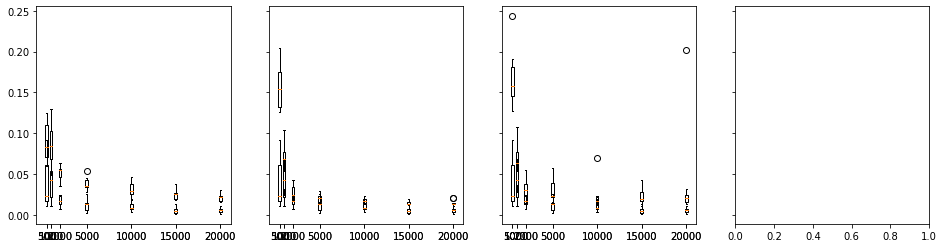

In [646]:
fig, ax = plt.subplots(1,4,figsize=(16,4), sharey=True)
#plt.boxplot(AID_NN)
for i in range(len(labels)):
    ax[0].boxplot(AID_NN[~np.isnan(AID_NN[:,i])][:,i], positions=[datasize[i]], widths=[300])
    ax[1].boxplot(AID_linear[~np.isnan(AID_linear[:,i])][:,i], positions=[datasize[i]], widths=[300])
    ax[2].boxplot(AID_linear_zdim2[~np.isnan(AID_linear_zdim2[:,i])][:,i], positions=[datasize[i]], widths=[300])
ax[0].boxplot(AID_analytical, positions=datasize,widths=[300]*len(datasize))
ax[1].boxplot(AID_analytical, positions=datasize,widths=[300]*len(datasize))
ax[2].boxplot(AID_analytical, positions=datasize,widths=[300]*len(datasize))
plt.show()

In [776]:
AID_linear_zdim2.shape

(10, 7)

# Notes on next round:
- We need to increase amount of epochs (Maybe learning rate change also, not necessarily): At least for low sample sizes
- We should maybe extend the amount of data to 20000 or something to evaluate convergence more clearly
- Can the problems be with AID estimation itself? (not accurate enough)

# New notes:
- AID estimation is a problem, should be accurate enough (can I estimate error directly?)
- Maybe could lower learning rate in the end for better results if we want, maybe increase epochs at the same time. -> especially learning rate thing for linear models, not fair right now

- Still need to improve: full CEVAE should have 300 epochs also and linears should have more in the low sample sizes

## Try fancy plot

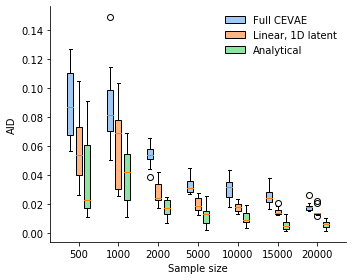

In [1080]:
plt.figure(figsize=(5,4))
palette = sns.color_palette("pastel")#plt.get_cmap('Set3')
places = list(range(len(labels)))
width = 0.15
diff = 0.21
for i in range(len(labels)):
    bplot1 = plt.boxplot(AID_NN[~np.isnan(AID_NN[:,i])][:,i], positions=[places[i]-diff*1], widths=[width],patch_artist=True)
    bplot2 = plt.boxplot(AID_linear[~np.isnan(AID_linear[:,i])][:,i], positions=[places[i]-diff*0], widths=[width],patch_artist=True)
    #bplot3 = plt.boxplot(AID_linear_zdim2[~np.isnan(AID_linear_zdim2[:,i])][:,i], positions=[places[i]+diff*0.5], widths=[width],patch_artist=True)
    bplot4 = plt.boxplot(AID_analytical[:,i], positions=[places[i]+diff*1],widths=[width],patch_artist=True)
    colors = [palette[num] for num in range(4)]
    for j,bplot in enumerate([bplot1,bplot2,bplot4]):
        for patch in bplot['boxes']:
            patch.set_facecolor(colors[j])
plt.xticks(places, datasize)
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
custom_lines = [Patch(facecolor=palette[i], edgecolor='black') for i in range(4)]
plt.legend(custom_lines, ["Full CEVAE", "Linear, 1D latent", "Analytical"], frameon=False)
plt.xlabel("Sample size")
plt.ylabel("AID")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.savefig("Figures/publication/linear_gaussian_convergence.png", bbox_inches = 'tight',
    pad_inches = 0.1)
plt.tight_layout()
plt.show()

# Try visualizing latent space use

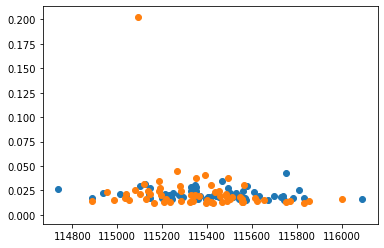

In [834]:
plt.scatter(final_losses_NN_zdim2_20k, AID_NN_zdim2_20k)
plt.scatter(final_losses_linear_zdim2_20k,AID_linear_zdim2_20k)

In [ ]:
losses_linear_zdim2['20000'][4]['y'][50:]

In [863]:
models_linear_zdim2['20000'][4].decoder.y_nn[0].weight

Parameter containing:
tensor([[-0.2851,  0.6076, -0.4583],
        [ 0.0211, -0.5603,  0.1207]], requires_grad=True)

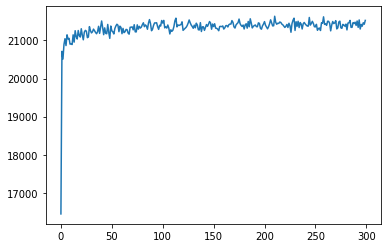

In [874]:
plt.plot(losses_NN_zdim2['20000'][3]['kld'][0:])

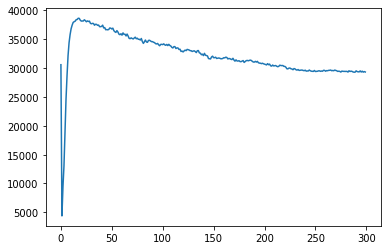

In [871]:
plt.plot(losses_linear_zdim2['20000'][4]['kld'][0:])

## Bad starting plots

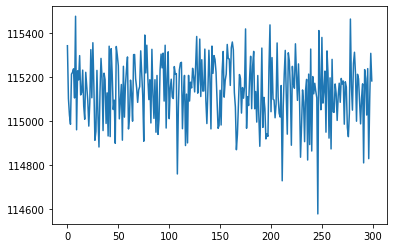

In [923]:
plt.plot(losses_linear_zdim2_badstart['7']['total'])

(array([1., 0., 1., 3., 0., 2., 1., 0., 1., 1.]),
 array([0.16607383, 0.17030374, 0.17453364, 0.17876355, 0.18299346,
        0.18722337, 0.19145327, 0.19568318, 0.19991309, 0.204143  ,
        0.2083729 ]),
 <a list of 10 Patch objects>)

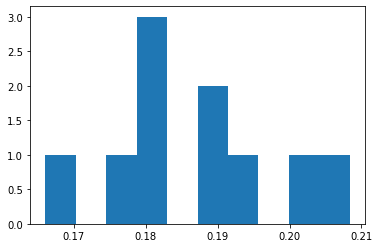

In [915]:
plt.hist(AID_linear_zdim2_20k_badstarting)

# Plot the results for the bad, handpicked starting

In [1081]:
model = CEVAE(x_dim=2, z_dim=2, device='cpu', p_y_zt_nn_layers=0,
        p_y_zt_nn_width=1, p_t_z_nn_layers=0, p_t_z_nn_width=1,
        p_x_z_nn_layers=0, p_x_z_nn_width=1, 
        q_z_nn_layers=0, q_z_nn_width=1,
        t_mode=0,y_mode=0,x_mode=[0,0],ty_separate_enc=False, z_mode=0, common_stds=True)
model.load_state_dict(torch.load("data/binary_data_tests/wrongresults/model1"))
with open("data/binary_data_tests/wrongresults/loss1", "rb") as f:
    losses = pickle.load(f)
with open("data/binary_data_tests/wrongresults/yweights1", "rb") as f:
    yweights = pickle.load(f)

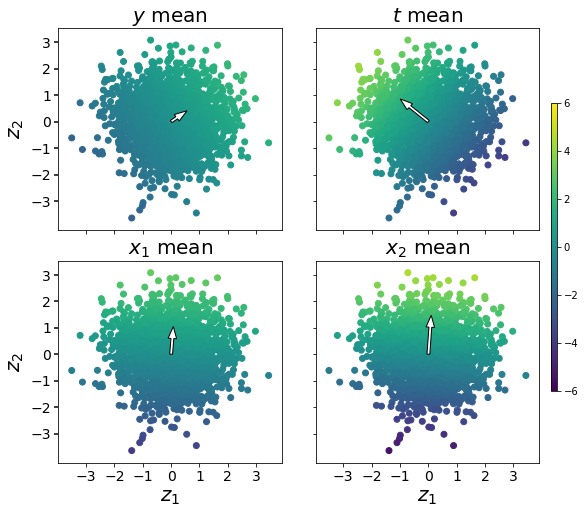

In [1102]:
fig, ax = plt.subplots(2,2,figsize=(8,8),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0.15, wspace=0.15)
zt = torch.cat([torch.randn((2000,2)),0*torch.ones((2000,1))], axis=1)
z = zt[:,:-1]
y_pred = model.decoder.y_nn(zt)
x_pred = model.decoder.x_nn(zt[:,:-1])
t_pred = model.decoder.t_nn(zt[:,:-1])
ax[0,0].scatter(zt[:,0],zt[:,1],c=y_pred[:,0].detach().numpy().squeeze(),vmin=-6,vmax=6)
ax[0,1].scatter(zt[:,0],zt[:,1],c=t_pred[:,0].detach().numpy().squeeze(),vmin=-6,vmax=6)
ax[1,0].scatter(zt[:,0],zt[:,1],c=x_pred[:,0].detach().numpy().squeeze(),vmin=-6,vmax=6)
pcm = ax[1,1].scatter(zt[:,0],zt[:,1],c=x_pred[:,1].detach().numpy().squeeze(),vmin=-6,vmax=6)
#Plot the arrows
wy = model.decoder.y_nn[0].weight[0,:-1].detach().numpy()
wt = model.decoder.t_nn[0].weight[0,:].detach().numpy()
wx1 = model.decoder.x_nn[0].weight[0,:].detach().numpy()
wx2 = model.decoder.x_nn[0].weight[1,:].detach().numpy()
ax[0,0].arrow(0,0,wy[0],wy[1],width=0.1,length_includes_head=True,facecolor="w")
ax[0,1].arrow(0,0,wt[0],wt[1],width=0.1,length_includes_head=True,facecolor="w")
ax[1,0].arrow(0,0,wx1[0],wx1[1],width=0.1,length_includes_head=True,facecolor="w")
ax[1,1].arrow(0,0,wx2[0],wx2[1],width=0.1,length_includes_head=True,facecolor="w")
ax[0,0].set_title("$y$ mean",fontsize=20)
ax[0,1].set_title("$t$ mean",fontsize=20)
ax[1,0].set_title("$x_1$ mean",fontsize=20)
ax[1,1].set_title("$x_2$ mean",fontsize=20)
ax[1,0].set_xlabel("$z_1$",fontsize=20)
ax[1,1].set_xlabel("$z_1$",fontsize=20)
ax[0,0].set_ylabel("$z_2$",fontsize=20)
ax[1,0].set_ylabel("$z_2$",fontsize=20)

plt.setp(ax[1,0].get_xticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[1,1].get_xticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[0,0].get_yticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[1,0].get_yticklabels(), rotation='horizontal', fontsize=14)
ax[0,0].tick_params(axis='y',direction='out', length=4, width=1.5,left=True,bottom=False)
ax[1,0].tick_params(axis='y',direction='out', length=4, width=1.5,left=True,bottom=True)

fig.subplots_adjust(right=0.96)
cbar_ax = fig.add_axes([0.98, 0.25, 0.01, 0.5])
fig.colorbar(pcm, cax=cbar_ax)

ax[1,0].set_xticks([-3,-2,-1,0,1,2,3])
ax[1,0].set_yticks([-3,-2,-1,0,1,2,3])
#ax[1,0].set_xticklabels([-4,2,0,2,4])

plt.savefig("Figures/publication/lingan2dlatentuse.png", bbox_inches = 'tight',
    pad_inches = 0.1)

In [1048]:
model_correct = CEVAE(x_dim=2, z_dim=2, device='cpu', p_y_zt_nn_layers=0,
        p_y_zt_nn_width=1, p_t_z_nn_layers=0, p_t_z_nn_width=1,
        p_x_z_nn_layers=0, p_x_z_nn_width=1, 
        q_z_nn_layers=0, q_z_nn_width=1,
        t_mode=0,y_mode=0,x_mode=[0,0],ty_separate_enc=False, z_mode=0, common_stds=True)
model_correct.load_state_dict(torch.load("data/binary_data_tests/wrongresults/model_correct"))
with open("data/binary_data_tests/wrongresults/loss_correct", "rb") as f:
    losses_correct = pickle.load(f)
with open("data/binary_data_tests/wrongresults/yweights_correct", "rb") as f:
    yweights_correct = pickle.load(f)

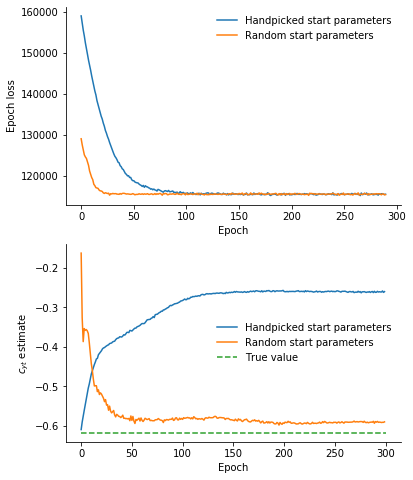

In [1104]:
cyts = [yw[0,2] for yw in yweights]
cyts_correct = [yw[0,2] for yw in yweights_correct]

fig, ax = plt.subplots(2,1,figsize=(6,8))
ax[0].plot(losses['total'][10:])
ax[0].plot(losses_correct['total'][10:])
ax[0].set_ylabel("Epoch loss")
ax[0].set_xlabel("Epoch")
ax[0].legend(["Handpicked start parameters", "Random start parameters"], frameon=False)
ax[1].set_ylabel("$c_{yt}$ estimate")
ax[1].set_xlabel("Epoch")
ax[1].plot(cyts)
ax[1].plot(cyts_correct)
ax[1].plot([0,300],[c_yt, c_yt],'--')
ax[1].legend(["Handpicked start parameters", "Random start parameters", "True value"], frameon=False)
for i in range(2):
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["top"].set_visible(False)

plt.savefig("Figures/publication/lingan2d_convergence.png", bbox_inches = 'tight',
    pad_inches = 0.1)

## Need to train a NN model with zdim=2 on the same data set

In [651]:
AID_linear_zdim2[:,-1].argmax()

4

In [603]:
print(np.sqrt(c_x**2+s_x**2))
dfs['20000'][9]['x1'].std()

[1.21417247 1.75770165]


1.767663883318975

In [623]:
zt = torch.Tensor([[0,1,0]])
print(model_NN_zdim2.decoder.x_nn(zt[:,:-1]))
#estimate_AID_lineardata(model_NN_zdim2, c_yt, 
#                            c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)[0]

tensor([[ 1.0266,  1.4643, -0.4313, -0.0210]], grad_fn=<AddmmBackward>)


In [652]:
dataset = datasets['20000'][4]
train_loader = DataLoader(dataset, shuffle=True, batch_size = 200)
plot_curves=False
print_logs=True

Epoch 0:
Sample batch loss: 1197.801025390625
Epoch loss: 136827.7938232422
x: 65159.77423095703, t: 34411.73992919922, y: 21288.21710205078, kld: 15968.062854766846
Epoch 1:
Sample batch loss: 1152.322265625
Epoch loss: 120500.02087402344
x: 55680.486877441406, t: 33512.76776123047, y: 17566.938995361328, kld: 13739.827033996582
Epoch 2:
Sample batch loss: 1156.0616455078125
Epoch loss: 116873.91650390625
x: 50704.534240722656, t: 32884.30352783203, y: 15863.354309082031, kld: 17421.72494506836
Epoch 3:
Sample batch loss: 1104.4287109375
Epoch loss: 116128.6884765625
x: 48872.78234863281, t: 32507.56317138672, y: 15151.207191467285, kld: 19597.136322021484
Epoch 4:
Sample batch loss: 1139.130615234375
Epoch loss: 115803.3154296875
x: 48252.592346191406, t: 31902.858917236328, y: 14497.172004699707, kld: 21150.692184448242
Epoch 5:
Sample batch loss: 1182.526123046875
Epoch loss: 115994.06799316406
x: 48147.92361450195, t: 32476.455535888672, y: 14481.739562988281, kld: 20887.949615478

Sample batch loss: 1137.1898193359375
Epoch loss: 115463.17578125
x: 47350.420989990234, t: 32583.202056884766, y: 14029.386985778809, kld: 21500.164657592773
Epoch 50:
Sample batch loss: 1154.2037353515625
Epoch loss: 115419.43005371094
x: 47426.99722290039, t: 32682.776977539062, y: 13963.693305969238, kld: 21345.962432861328
Epoch 51:
Sample batch loss: 1207.75341796875
Epoch loss: 115468.1748046875
x: 47502.68142700195, t: 32668.785369873047, y: 14108.417442321777, kld: 21188.29071044922
Epoch 52:
Sample batch loss: 1141.5723876953125
Epoch loss: 115549.84252929688
x: 47427.625427246094, t: 32766.282653808594, y: 14166.941947937012, kld: 21188.992767333984
Epoch 53:
Sample batch loss: 1112.3515625
Epoch loss: 115161.70849609375
x: 47316.60485839844, t: 32726.754119873047, y: 13821.365211486816, kld: 21296.98390197754
Epoch 54:
Sample batch loss: 1162.9197998046875
Epoch loss: 115394.77514648438
x: 47485.08282470703, t: 32651.36996459961, y: 13897.522903442383, kld: 21360.7996215820

Sample batch loss: 1151.751953125
Epoch loss: 115170.39038085938
x: 47428.768310546875, t: 32705.254516601562, y: 13776.664138793945, kld: 21259.70425415039
Epoch 99:
Sample batch loss: 1124.343994140625
Epoch loss: 115395.24755859375
x: 47425.87463378906, t: 32678.260803222656, y: 13853.253677368164, kld: 21437.858856201172
Epoch 100:
Sample batch loss: 1160.4852294921875
Epoch loss: 115368.06005859375
x: 47323.68539428711, t: 32681.623962402344, y: 13961.402351379395, kld: 21401.348037719727
Epoch 101:
Sample batch loss: 1127.8992919921875
Epoch loss: 115411.85180664062
x: 47336.4987487793, t: 32637.67269897461, y: 13946.721458435059, kld: 21490.958923339844
Epoch 102:
Sample batch loss: 1132.35791015625
Epoch loss: 115261.46411132812
x: 47342.050231933594, t: 32589.314422607422, y: 13965.038185119629, kld: 21365.061950683594
Epoch 103:
Sample batch loss: 1149.0032958984375
Epoch loss: 114979.92138671875
x: 47309.20477294922, t: 32498.35971069336, y: 14048.92975616455, kld: 21123.427

Sample batch loss: 1132.4808349609375
Epoch loss: 115379.77124023438
x: 47300.62854003906, t: 32623.317291259766, y: 14008.845222473145, kld: 21446.980590820312
Epoch 148:
Sample batch loss: 1176.658447265625
Epoch loss: 115166.90100097656
x: 47299.15252685547, t: 32614.529296875, y: 13956.988731384277, kld: 21296.23045349121
Epoch 149:
Sample batch loss: 1147.9075927734375
Epoch loss: 115295.09643554688
x: 47277.01663208008, t: 32590.105560302734, y: 14006.96672821045, kld: 21421.007934570312
Epoch 150:
Sample batch loss: 1158.5797119140625
Epoch loss: 115223.92883300781
x: 47171.385986328125, t: 32540.723419189453, y: 14033.875839233398, kld: 21477.943450927734
Epoch 151:
Sample batch loss: 1124.719970703125
Epoch loss: 115273.69055175781
x: 47336.71383666992, t: 32509.39569091797, y: 13988.227355957031, kld: 21439.353912353516
Epoch 152:
Sample batch loss: 1174.2086181640625
Epoch loss: 115154.42553710938
x: 47240.264587402344, t: 32585.34344482422, y: 13958.384452819824, kld: 21370

Sample batch loss: 1140.2926025390625
Epoch loss: 115304.51904296875
x: 47302.66604614258, t: 32659.399444580078, y: 14034.213562011719, kld: 21308.239639282227
Epoch 197:
Sample batch loss: 1135.2847900390625
Epoch loss: 115264.16052246094
x: 47329.1842956543, t: 32656.274047851562, y: 13903.991371154785, kld: 21374.710861206055
Epoch 198:
Sample batch loss: 1153.3546142578125
Epoch loss: 115165.36743164062
x: 47233.78042602539, t: 32682.931518554688, y: 13969.65837097168, kld: 21278.996337890625
Epoch 199:
Sample batch loss: 1120.07421875
Epoch loss: 115217.11083984375
x: 47276.82717895508, t: 32706.368865966797, y: 13917.328033447266, kld: 21316.586502075195


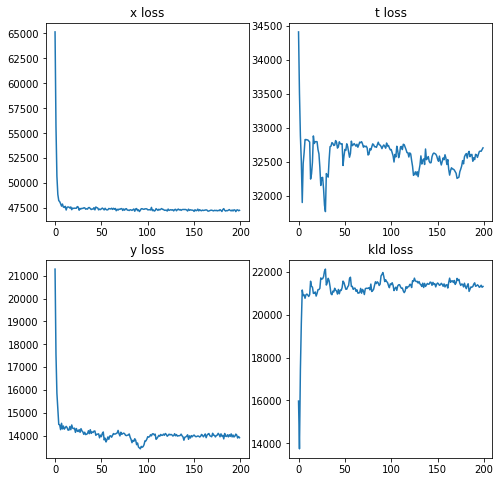

Total loss in the end:  115217.11083984375


In [653]:
model_NN_zdim2, losses_NN_zdim2 = train_model(device, plot_curves, print_logs,
              train_loader, num_epochs=200, lr_start=0.01, lr_end=0.001, x_dim=2, z_dim=2,
              p_y_zt_nn_layers=3, p_y_zt_nn_width=30, 
              p_t_z_nn_layers=3, p_t_z_nn_width=30,
              p_x_z_nn_layers=3, p_x_z_nn_width=30,
              q_z_nn_layers=0, q_z_nn_width=30,
              t_mode=0, y_mode=0, x_mode=[0,0], ty_separate_enc=False, common_stds=False)

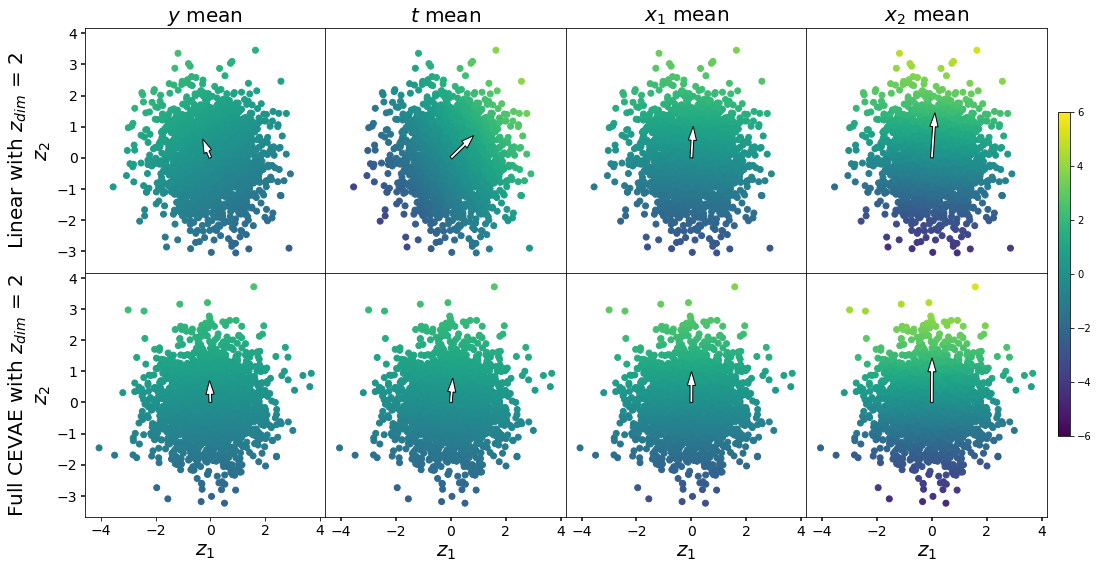

In [694]:
fig, ax = plt.subplots(2,4,figsize=(16,9),sharex=True,sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)
models = [models_linear_zdim2["20000"][4], model_NN_zdim2]
for i in range(2):
    model = models[i]
    zt = torch.cat([torch.randn((2000,2)),0*torch.ones((2000,1))], axis=1)
    z = zt[:,:-1]
    y_pred = model.decoder.y_nn(zt)
    x_pred = model.decoder.x_nn(zt[:,:-1])
    t_pred = model.decoder.t_nn(zt[:,:-1])
    ax[i,0].scatter(zt[:,0],zt[:,1],c=y_pred[:,0].detach().numpy().squeeze(),vmin=-6,vmax=6)
    ax[i,1].scatter(zt[:,0],zt[:,1],c=t_pred[:,0].detach().numpy().squeeze(),vmin=-6,vmax=6)
    ax[i,2].scatter(zt[:,0],zt[:,1],c=x_pred[:,0].detach().numpy().squeeze(),vmin=-6,vmax=6)
    pcm = ax[i,3].scatter(zt[:,0],zt[:,1],c=x_pred[:,1].detach().numpy().squeeze(),vmin=-6,vmax=6)
    #Plot the arrows
    if i == 0:
        wy = model.decoder.y_nn[0].weight[0,:-1].detach().numpy()
        wt = model.decoder.t_nn[0].weight[0,:].detach().numpy()
        wx1 = model.decoder.x_nn[0].weight[0,:].detach().numpy()
        wx2 = model.decoder.x_nn[0].weight[1,:].detach().numpy()
    else:
        zt.requires_grad = True
        z.requires_grad = True
        #model.zero_grad()
        x_pred = model.decoder.x_nn(z)
        wx1 = torch.autograd.grad(x_pred[:, 0].sum(), z, retain_graph=True)[0].data.mean(0).detach()
        wx2 = torch.autograd.grad(x_pred[:, 1].sum(), z, retain_graph=True)[0].data.mean(0).detach()
        t_pred = model.decoder.t_nn(z)
        wt = torch.autograd.grad(t_pred[:, 0].sum(), z, retain_graph=True)[0].data.mean(0).detach()
        y_pred = model.decoder.y_nn(zt)
        wy = torch.autograd.grad(y_pred[:, 0].sum(), zt, retain_graph=True)[0].data.mean(0).detach()
    ax[i,0].arrow(0,0,wy[0],wy[1],width=0.1,length_includes_head=True,facecolor="w")
    ax[i,1].arrow(0,0,wt[0],wt[1],width=0.1,length_includes_head=True,facecolor="w")
    ax[i,2].arrow(0,0,wx1[0],wx1[1],width=0.1,length_includes_head=True,facecolor="w")
    ax[i,3].arrow(0,0,wx2[0],wx2[1],width=0.1,length_includes_head=True,facecolor="w")
#plt.tight_layout()

titles = ["$y$ mean","$t$ mean","$x_1$ mean","$x_2$ mean"]
for i in range(4):
    ax[0,i].set_title(titles[i],fontsize=20)
    ax[1,i].set_xlabel("$z_1$",fontsize=20)
    plt.setp(ax[1,i].get_xticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[0,0].get_yticklabels(), rotation='horizontal', fontsize=14)
plt.setp(ax[1,0].get_yticklabels(), rotation='horizontal', fontsize=14)
ax[0,0].tick_params(axis='y',direction='out', length=4, width=1.5,left=True,bottom=False)
ax[1,0].tick_params(axis='y',direction='out', length=4, width=1.5,left=True,bottom=True)
ax[0,0].set_ylabel("Linear with $z_{dim}$ = 2\n$z_2$",fontsize=20)
ax[1,0].set_ylabel("Full CEVAE with $z_{dim}$ = 2\n$z_2$",fontsize=20)
for i in range(1,4):
    ax[0,i].tick_params(axis='both',direction='out', length=4, width=1.5,left=False,bottom=False)
    ax[1,i].tick_params(axis='both',direction='out', length=4, width=1.5,left=False,bottom=True)
    
fig.subplots_adjust(right=0.96)
cbar_ax = fig.add_axes([0.97, 0.25, 0.01, 0.5])
fig.colorbar(pcm, cax=cbar_ax)
plt.savefig("Figures/publication/zdim2_latent_use.png", bbox_inches = 'tight',
    pad_inches = 0.1)
plt.show()

In [925]:
print(c_t, c_yz)

[0.77905604] [0.71252344]


In [636]:
z = zt[:,:-1]
z.requires_grad = True
model_NN_zdim2.zero_grad()
x_pred = model_NN_zdim2.decoder.x_nn(z)
torch.autograd.grad(x_pred[:, 0].sum(), z, retain_graph=True)[0].data.mean(0)

tensor([-0.0169,  1.0304])

# Other playing around

In [439]:
output = estimate_AID_lineardata(models_NN['20000'][0], c_yt, 
                            c_yz, s_y, c_t, s_t, c_x, n=100, lim=6, nsample=10000)
output[0]

0.029532154950112372

In [ ]:
#with n=100, nsample=10000
0.0302
0.032
0.03074
0.0295

#with n=150, nsample=10000
0.0305
0.0288
0.0303

In [248]:
df = dfs['3000'][0]
cov = df[['x0','x1','t','y']].cov().to_numpy()
cov[0,0]

1.5057299020055908

In [451]:
AID_linear_zdim2[:,-1]

array([0.03189282, 0.02249052, 0.02817162, 0.01979177, 0.01621873,
       0.02886102, 0.03248309, 0.03023479, 0.0160995 , 0.05287544])

In [472]:
models_linear_zdim2['20000'][9].decoder.x_nn[0].weight

Parameter containing:
tensor([[-0.0073, -1.0321],
        [-0.0502, -1.4523],
        [ 0.3909,  0.3306],
        [ 0.4632,  0.0161]], requires_grad=True)

In [316]:
s_y

array([0.48454304])

In [317]:
df = linear_data_df(1000000, c_x, c_t, c_yz, c_yt, s_x, s_t, s_y)

In [321]:
analytical_sy_estimate(cov_from_df(df))

0.48508713996930164

# Binary data

In [1105]:
main_folder = "binary_data_tests"

In [1106]:
# Load data gen parameters
sub_folder_params = "params1"
[z_probs,x_probs,t_probs,y_probs] = load_dataparameters(main_folder, sub_folder_params)

In [1107]:
data_sub_folder = "params1data1000to40000"
param_times = 10
dfs, datasets = load_dfs(main_folder, data_sub_folder, param_times=param_times)
datasize = sorted([int(ds) for ds in dfs.keys()])

In [1108]:
device = 'cpu'

num_epochs=200
lr_start=0.01
lr_end=0.001
z_dim=10
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=2
x_mode=np.array([2,2])
x_dim = 2
ty_separate_enc=False
z_mode=0
x_loss_scaling=1
common_stds = False

train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]
labels = [str(dsize) for dsize in datasize]
sub_folder_model = "params1data1000to40000NNmodels"
models_NN, losses_NN = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [1109]:
num_epochs=200
lr_start=0.01
lr_end=0.001
z_dim=1
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=2
x_mode=np.array([2,2])
x_dim = 2
ty_separate_enc=False
z_mode=0
train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]
sub_folder_model = "params1data1000to40000NNmodelszdim1"

models_NN_zdim1, losses_NN_zdim1 = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [1110]:
num_epochs=200
lr_start=0.01
lr_end=0.001
z_dim=1
p_y_zt_nn_layers=3
p_y_zt_nn_width=30
p_t_z_nn_layers=3
p_t_z_nn_width=30
p_x_z_nn_layers=3
p_x_z_nn_width=30
q_z_nn_layers=3
q_z_nn_width=30
t_mode=2
y_mode=2
x_mode=np.array([2,2])
x_dim = 2
ty_separate_enc=False
z_mode=2
train_arguments = [num_epochs, lr_start, lr_end, x_dim, z_dim,
                p_y_zt_nn_layers, p_y_zt_nn_width, 
                p_t_z_nn_layers, p_t_z_nn_width,
                p_x_z_nn_layers, p_x_z_nn_width,
                q_z_nn_layers, q_z_nn_width, t_mode, y_mode,
                x_mode, ty_separate_enc, z_mode, x_loss_scaling, common_stds]
sub_folder_model = "params1data1000to40000NNmodelsbinaryz"
models_NN_binaryz, losses_NN_binaryz = load_models_losses(main_folder, sub_folder_model, train_arguments, labels, device)

In [1111]:
AID_NN = np.zeros((param_times, len(labels)))
AID_NN_zdim1 = np.zeros((param_times, len(labels)))
AID_NN_binaryz = np.zeros((param_times, len(labels)))

gothrough = [(AID_NN, models_NN),(AID_NN_zdim1, models_NN_zdim1),(AID_NN_binaryz, models_NN_binaryz)]
for AID_,models_ in gothrough:
    for i,label in enumerate(labels):
        print(label)
        for j in range(param_times):
            AID_[j,i] = estimate_AID(models_[label][j],z_probs,t_probs,y_probs,n=10000)

1000
3000
5000
10000
15000
20000
30000
40000
1000
3000
5000
10000
15000
20000
30000
40000
1000
3000
5000
10000
15000
20000
30000
40000


In [933]:
# analytical AIDs
from binary_analytical_methods import *
AID_miao = np.zeros((param_times,len(labels)))
py_dots_miao = np.zeros((len(labels),2))
for i, label in enumerate(labels):
    for j in range(param_times):
        py_dot1, py_dot0 = analytical_miao_pydot(dfs[label][j])
        py_dot_miao = np.array([[1-py_dot0.item(), py_dot0.item()],[1-py_dot1.item(), py_dot1.item()]])
        py_dots_miao[i,:] = np.array([py_dot0.item(),py_dot1.item()])
        AID_miao[j,i] = estimate_AID_from_py_dot(py_dot_miao, z_probs, t_probs, y_probs)

In [964]:
true_pydot = estimate_true_py_dot(z_probs,y_probs)[:,1]

In [1112]:
py_dots_NN = np.zeros((param_times,len(labels),2))
py_dots_binaryz = np.zeros((param_times,len(labels),2))
gothrough = [(py_dots_NN, models_NN),(py_dots_binaryz, models_NN_binaryz)]
for py_dots_,models_ in gothrough:
    for i,label in enumerate(labels):
        for j in range(param_times):
            py_dot = estimate_model_py_dot(models_[label][j],n=10000)
            py_dots_[j,i,:] = py_dot[:,1]

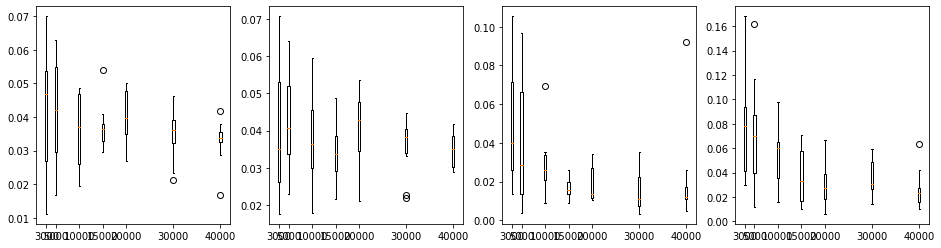

In [717]:
fig, ax = plt.subplots(1,4,figsize=(16,4), sharey=False)
for i in range(len(labels)):
    if i>=1:
        ax[0].boxplot(AID_NN[~np.isnan(AID_NN[:,i])][:,i], positions=[datasize[i]], widths=[500])
        ax[1].boxplot(AID_NN_zdim1[~np.isnan(AID_NN_zdim1[:,i])][:,i], positions=[datasize[i]], widths=[500])
        ax[2].boxplot(AID_NN_binaryz[~np.isnan(AID_NN_binaryz[:,i])][:,i], positions=[datasize[i]], widths=[500])
        ax[3].boxplot(AID_miao[:,i], positions=[datasize[i]],widths=[500])
#ax[3].plot(datasize[:], AID_miao[:], 'o-')
plt.show()

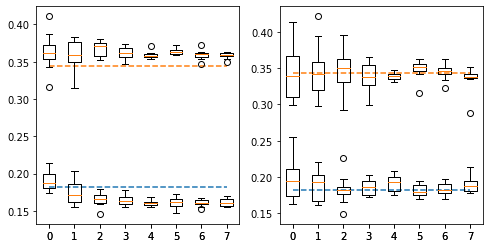

In [971]:
fix, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot([0,7],[true_pydot[1],true_pydot[1]],'--')
ax[0].plot([0,7],[true_pydot[0],true_pydot[0]],'--')
ax[0].boxplot(py_dots_NN[:,:,1], positions=range(len(labels)))
ax[0].boxplot(py_dots_NN[:,:,0], positions=range(len(labels)))

ax[1].plot([0,7],[true_pydot[1],true_pydot[1]],'--')
ax[1].plot([0,7],[true_pydot[0],true_pydot[0]],'--')
ax[1].boxplot(py_dots_binaryz[:,:,1], positions=range(len(labels)))
ax[1].boxplot(py_dots_binaryz[:,:,0], positions=range(len(labels)))
plt.show()

## Notes on next round:
- probably we need even more samples to be sure about the results, and we don't need to start at 500. 
- But: Seems that it doesn't converge to the correct result!
- Ideally we want to see that also the analytical method performs better than VAE with gaussian latent

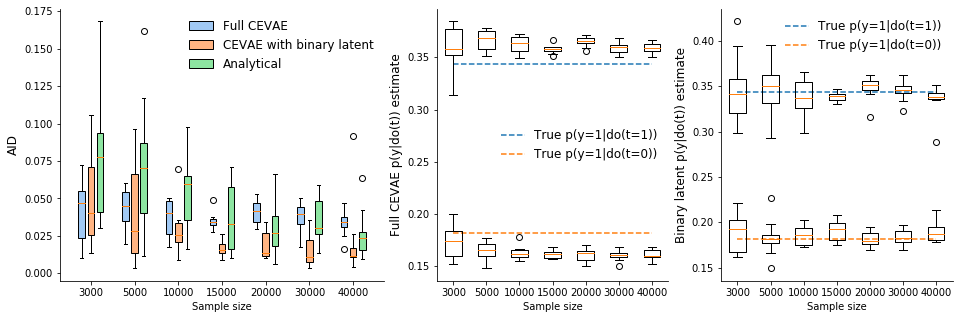

In [1132]:
fig, ax = plt.subplots(1,3,figsize=(16,5), gridspec_kw = {"width_ratios":[7,5,5]})
#plt.figure(figsize=(6,5))
palette = sns.color_palette("pastel")#plt.get_cmap('Set3')
places = list(range(len(labels)))
width = 0.15
diff = 0.21
for i in range(1,len(labels)):
    bplot1 = ax[0].boxplot(AID_NN[~np.isnan(AID_NN[:,i])][:,i], positions=[places[i]-diff*1], widths=[width],patch_artist=True)
    bplot2 = ax[0].boxplot(AID_NN_binaryz[~np.isnan(AID_NN_binaryz[:,i])][:,i], positions=[places[i]], widths=[width],patch_artist=True)
    bplot3 = ax[0].boxplot(AID_miao[:,i], positions=[places[i]+diff*1],widths=[width],patch_artist=True)
    colors = [palette[num] for num in range(4)]
    for j,bplot in enumerate([bplot1,bplot2,bplot3]):
        for patch in bplot['boxes']:
            patch.set_facecolor(colors[j])

from matplotlib.lines import Line2D
from matplotlib.patches import Patch
custom_lines = [Patch(facecolor=palette[i], edgecolor='black') for i in range(3)]
ax[0].legend(custom_lines, ["Full CEVAE", "CEVAE with binary latent", "Analytical"], frameon=False, fontsize=12)
ax[0].set_ylabel("AID", fontsize=12)

ax[1].plot([places[1],places[-1]],[true_pydot[0],true_pydot[0]],'--')
ax[1].plot([places[1],places[-1]],[true_pydot[1],true_pydot[1]],'--')
ax[1].legend(["True p(y=1|do(t=1))","True p(y=1|do(t=0))"], frameon=False, fontsize=12)
ax[1].boxplot(py_dots_NN[:,1:,1], positions=places[1:])
ax[1].boxplot(py_dots_NN[:,1:,0], positions=places[1:])
ax[1].set_ylabel("Full CEVAE p(y|do(t)) estimate", fontsize=12)

ax[2].plot([places[1],places[-1]],[true_pydot[0],true_pydot[0]],'--')
ax[2].plot([places[1],places[-1]],[true_pydot[1],true_pydot[1]],'--')
ax[2].legend(["True p(y=1|do(t=1))","True p(y=1|do(t=0))"], frameon=False, fontsize=12)
ax[2].boxplot(py_dots_binaryz[:,1:,1], positions=places[1:])
ax[2].boxplot(py_dots_binaryz[:,1:,0], positions=places[1:])
ax[2].set_ylabel("Binary latent p(y|do(t)) estimate", fontsize=12)


for i in range(3):
    ax[i].set_xlabel("Sample size")
    ax[i].set_xticks(places[1:])
    ax[i].set_xticklabels(datasize[1:], fontsize=10)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(10) 
for i in range(3):
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["top"].set_visible(False)

#plt.tight_layout()
plt.savefig("Figures/publication/binary_data_convergence.png", bbox_inches = 'tight',
    pad_inches = 0.1)
plt.show()